In [1]:
# Step (a): Read sequences from the text file
sequences = []
with open('C:/Users/EwekaE/Downloads/test.txt', 'r') as file:
    for line in file:
        sequences.append(line.strip())

# Step b(i): Preprocess sequences (if needed)
# convert all characters to lowercase
sequences = [seq.lower() for seq in sequences]

# Step b(ii): Convert sequences to a numerical representation (TF-IDF vectors)
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(sequences)


# Task 1: To cluster the inliers into an appropriate number of groups


# Step (c): Determine the number of clusters
# elbow method or silhouette analysis can be used to find the optimal number of clusters
# but for simplicity,I am choosing an arbitrary number of clusters 
num_clusters = 5

# Step (d): Perform clustering
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=0)
cluster_labels = kmeans.fit_predict(X)

# Step (e): Print cluster labels for inliers
for i, label in enumerate(cluster_labels):
    print(f"Sequence {i}: Cluster {label}")
    
# Note:Outliers are not being clustered, K-means inherently assigns them to the nearest cluster
# it shows that most of the sequences are assigned to cluster 0
# see in next code




Sequence 0: Cluster 0
Sequence 1: Cluster 0
Sequence 2: Cluster 0
Sequence 3: Cluster 0
Sequence 4: Cluster 0
Sequence 5: Cluster 0
Sequence 6: Cluster 0
Sequence 7: Cluster 0
Sequence 8: Cluster 0
Sequence 9: Cluster 0
Sequence 10: Cluster 0
Sequence 11: Cluster 0
Sequence 12: Cluster 0
Sequence 13: Cluster 0
Sequence 14: Cluster 0
Sequence 15: Cluster 0
Sequence 16: Cluster 0
Sequence 17: Cluster 0
Sequence 18: Cluster 0
Sequence 19: Cluster 0
Sequence 20: Cluster 0
Sequence 21: Cluster 0
Sequence 22: Cluster 0
Sequence 23: Cluster 0
Sequence 24: Cluster 0
Sequence 25: Cluster 0
Sequence 26: Cluster 0
Sequence 27: Cluster 0
Sequence 28: Cluster 0
Sequence 29: Cluster 0
Sequence 30: Cluster 0
Sequence 31: Cluster 0
Sequence 32: Cluster 0
Sequence 33: Cluster 0
Sequence 34: Cluster 0
Sequence 35: Cluster 0
Sequence 36: Cluster 0
Sequence 37: Cluster 0
Sequence 38: Cluster 0
Sequence 39: Cluster 0
Sequence 40: Cluster 0
Sequence 41: Cluster 0
Sequence 42: Cluster 0
Sequence 43: Cluster 

In [7]:
# Step (f): Show the number of clusters
import numpy as np

unique_clusters, cluster_counts = np.unique(cluster_labels, return_counts=True)
print("Number of clusters:", len(unique_clusters))
for cluster, count in zip(unique_clusters, cluster_counts):
    print(f"Cluster {cluster}: {count} sequences")


Number of clusters: 5
Cluster 0: 1196 sequences
Cluster 1: 1 sequences
Cluster 2: 1 sequences
Cluster 3: 1 sequences
Cluster 4: 1 sequences


In [9]:
# Task 2: To generate a novel prototypical sequence for each cluster


# Step(g): Define identifiers list
identifiers = []

#  Step (d): Perform clustering
kmeans = KMeans(n_clusters=5, random_state=0)
cluster_labels = kmeans.fit_predict(X)

# Step (h): Get the cluster centers
cluster_centers = kmeans.cluster_centers_

# Task 2: Generate novel prototypical sequences for each cluster
prototypical_sequences = []
for cluster_center in cluster_centers:
    # Calculate distances between the cluster center and all sequences
    distances = np.linalg.norm(X - cluster_center, axis=1)
    
    # Find the index of the closest sequence that is not already in the dataset
    min_distance_idx = np.argsort(distances)[0]
    while min_distance_idx in identifiers:
        min_distance_idx = np.argsort(distances)[1]  # Move to the next closest sequence
    
    # Add the closest sequence to the list of prototypical sequences
    prototypical_sequences.append(sequences[min_distance_idx])
    
    # Add the index of the selected sequence to the list of identifiers
    identifiers.append(min_distance_idx)

# Print the prototypical sequences for each cluster
for i, prototypical_sequence in enumerate(prototypical_sequences):
    print(f"Cluster {i} Prototypical Sequence: {prototypical_sequence}")


Cluster 0 Prototypical Sequence: 1 didhdfgdgddefedgdddhdegiegidggefhidggfigddgeiefiffieheddfediggegddegddgifdhdefdgdedgdeegifedeifhidieffedefiifgiidiigigddffeidedgefgffhgd
Cluster 1 Prototypical Sequence: 711 gdidiigffhdggfieeifdigdiiefegggeidgdediidhegeehfddffefdeghiffeeiidgddghdegdidgegfiddeeiegddfddeihgdihdffeffdfdeddgffgiggdihef
Cluster 2 Prototypical Sequence: 1017 heeigfdfdfgddgfgddieifgffefiiddfdfdfidgdiiiedgeiggffgdfhfefdhiddieeehfiehgedefhdeideefhgdddfidddgfegfgegfeeghedgdgidiiddgdegd
Cluster 3 Prototypical Sequence: 356 ifeedgfgfdhidifddeddgfeddgediiegieehdfgdfiddgffigddgggefffhihheddfedfggegddeggggifdedehdgdeigieegigeigifhddgeeieiefdifdiidfegiiddffdd
Cluster 4 Prototypical Sequence: 572 diigffhdigdffeifegedffdihgegegggdfdffdheieedfgeggdddegfiffeediigddgdgegdidggggiedefiegdfiddeihgdifdffeffdhdeededdiigfdihghgigieddfed


In [10]:
# step(g) Define identifiers list
identifiers = []

# Step(d): Perform clustering
kmeans = KMeans(n_clusters=5, random_state=0)
cluster_labels = kmeans.fit_predict(X)

# Print sequence identifier and cluster label
for i, (sequence, label) in enumerate(zip(sequences, cluster_labels)):
    if label == -1:
        print(f"Sequence {i} is an outlier")
    else:
        print(f"Sequence {i} belongs to Cluster {label}")

# Step (h): Get the cluster centers
cluster_centers = kmeans.cluster_centers_

# Task 2: Generate novel prototypical sequences for each cluster
prototypical_sequences = []
for cluster_center in cluster_centers:
    # Calculate distances between the cluster center and all sequences
    distances = np.linalg.norm(X - cluster_center, axis=1)
    
    # Find the index of the closest sequence that is not already in the dataset
    min_distance_idx = np.argsort(distances)[0]
    while min_distance_idx in identifiers:
        min_distance_idx = np.argsort(distances)[1]  # Move to the next closest sequence
    
    # Add the closest sequence to the list of prototypical sequences
    prototypical_sequences.append(sequences[min_distance_idx])
    
    # Add the index of the selected sequence to the list of identifiers
    identifiers.append(min_distance_idx)

# Print the prototypical sequences for each cluster
for i, prototypical_sequence in enumerate(prototypical_sequences):
    print(f"Cluster {i} Prototypical Sequence: {prototypical_sequence}")


Sequence 0 belongs to Cluster 0
Sequence 1 belongs to Cluster 0
Sequence 2 belongs to Cluster 0
Sequence 3 belongs to Cluster 0
Sequence 4 belongs to Cluster 0
Sequence 5 belongs to Cluster 0
Sequence 6 belongs to Cluster 0
Sequence 7 belongs to Cluster 0
Sequence 8 belongs to Cluster 0
Sequence 9 belongs to Cluster 0
Sequence 10 belongs to Cluster 0
Sequence 11 belongs to Cluster 0
Sequence 12 belongs to Cluster 0
Sequence 13 belongs to Cluster 0
Sequence 14 belongs to Cluster 0
Sequence 15 belongs to Cluster 0
Sequence 16 belongs to Cluster 0
Sequence 17 belongs to Cluster 0
Sequence 18 belongs to Cluster 0
Sequence 19 belongs to Cluster 0
Sequence 20 belongs to Cluster 0
Sequence 21 belongs to Cluster 0
Sequence 22 belongs to Cluster 0
Sequence 23 belongs to Cluster 0
Sequence 24 belongs to Cluster 0
Sequence 25 belongs to Cluster 0
Sequence 26 belongs to Cluster 0
Sequence 27 belongs to Cluster 0
Sequence 28 belongs to Cluster 0
Sequence 29 belongs to Cluster 0
Sequence 30 belongs 

Cluster 0 Prototypical Sequence: 1 didhdfgdgddefedgdddhdegiegidggefhidggfigddgeiefiffieheddfediggegddegddgifdhdefdgdedgdeegifedeifhidieffedefiifgiidiigigddffeidedgefgffhgd
Cluster 1 Prototypical Sequence: 711 gdidiigffhdggfieeifdigdiiefegggeidgdediidhegeehfddffefdeghiffeeiidgddghdegdidgegfiddeeiegddfddeihgdihdffeffdfdeddgffgiggdihef
Cluster 2 Prototypical Sequence: 1017 heeigfdfdfgddgfgddieifgffefiiddfdfdfidgdiiiedgeiggffgdfhfefdhiddieeehfiehgedefhdeideefhgdddfidddgfegfgegfeeghedgdgidiiddgdegd
Cluster 3 Prototypical Sequence: 356 ifeedgfgfdhidifddeddgfeddgediiegieehdfgdfiddgffigddgggefffhihheddfedfggegddeggggifdedehdgdeigieegigeigifhddgeeieiefdifdiidfegiiddffdd
Cluster 4 Prototypical Sequence: 572 diigffhdigdffeifegedffdihgegegggdfdffdheieedfgeggdddegfiffeediigddgdgegdidggggiedefiegdfiddeihgdifdffeffdhdeededdiigfdihghgigieddfed


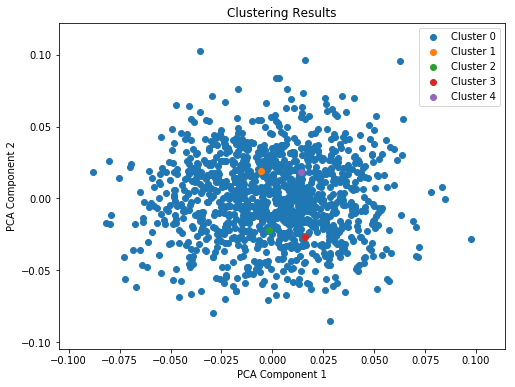

In [22]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X.toarray())

# Plot the clusters
plt.figure(figsize=(8, 6))
for cluster_id in set(cluster_labels):
    plt.scatter(X_reduced[cluster_labels == cluster_id, 0], X_reduced[cluster_labels == cluster_id, 1], label=f'Cluster {cluster_id}')

plt.title('Clustering Results')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()
#This is to visualize the clusters
#The scatter plots shows how well-separated the clusters are in
#the feature space and the distribution of data points 
#within each cluster
